<a href="https://colab.research.google.com/github/hanahh080601/Colab/blob/main/CNN_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignments CNN:
- Xây dựng model phân loại các vật trong tập dữ liệu cifar10 (load từ keras)
- Kiến trức model: CNN (num=32, act="relu") -> MaxPooling -> CNN (num=64, act="relu") -> MaxPooling -> CNN (num=64 act="relu") -> flatten-> Dense(64, acti="relu") -> Dense(class_number)
- Tìm hiểu cách lưu checkpoint
- Dùng batchsize

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models 
from keras.callbacks import ModelCheckpoint

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [3]:
print(X_train[0].shape) # 32 matrix, each has 3 columns and 32 rows
y_train = y_train.reshape(-1,)

(32, 32, 3)


In [4]:
class_name = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [5]:
def plot_sample(X, y, index):
  plt.figure(figsize=(5,3))
  plt.imshow(X[index])
  plt.xlabel(class_name[y[index]])

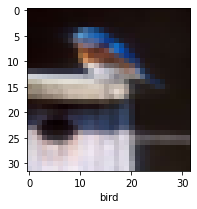

In [6]:
plot_sample(X_train, y_train, 13)

In [7]:
X_train = X_train / 255
X_test = X_test / 255

In [25]:
model = models.Sequential()
#CNN
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), input_shape=(32,32,3), activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
#Dense
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [36]:
model.compile(optimizer='adam', metrics=['accuracy'], loss='sparse_categorical_crossentropy')

In [10]:
#model.fit(X_train, y_train, epochs=5)

In [37]:
filepath="weights-best-file.hdf5"
checkpoint = ModelCheckpoint(filepath, 
                             monitor = 'val_accuracy', 
                             verbose = 1, 
                             save_best_only = True, 
                             mode = 'max')

callbacks_list = [checkpoint]

In [38]:
def generator(X_train, y_train, batch_size):
  while True:
    #shuffle

    #load data for each batch
    for i in range(0, len(X_train), batch_size):
      x_batch = X_train[i: i + batch_size]
      y_batch = y_train[i: i + batch_size]
      yield x_batch, y_batch

In [40]:
history = model.fit(generator(X_train, y_train, 10000), epochs=10, callbacks=callbacks_list, batch_size=10000, shuffle=True, steps_per_epoch=len(X_train)//10000)

Epoch 1/10
5/5 [==============================] - 56s 11s/step - loss: 0.2950 - accuracy: 0.9027
Epoch 2/10
5/5 [==============================] - 56s 11s/step - loss: 0.2907 - accuracy: 0.9038
Epoch 3/10
5/5 [==============================] - 56s 11s/step - loss: 0.2864 - accuracy: 0.9063
Epoch 4/10
5/5 [==============================] - 56s 11s/step - loss: 0.2822 - accuracy: 0.9077
Epoch 5/10
5/5 [==============================] - 56s 11s/step - loss: 0.2779 - accuracy: 0.9094
Epoch 6/10
5/5 [==============================] - 56s 11s/step - loss: 0.2737 - accuracy: 0.9114
Epoch 7/10
5/5 [==============================] - 56s 11s/step - loss: 0.2696 - accuracy: 0.9129
Epoch 8/10
5/5 [==============================] - 56s 11s/step - loss: 0.2656 - accuracy: 0.9147
Epoch 9/10
5/5 [==============================] - 56s 11s/step - loss: 0.2616 - accuracy: 0.9160
Epoch 10/10
5/5 [==============================] - 56s 11s/step - loss: 0.2577 - accuracy: 0.9175


In [42]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.9572 - accuracy: 0.7352


[0.957242488861084, 0.7351999878883362]

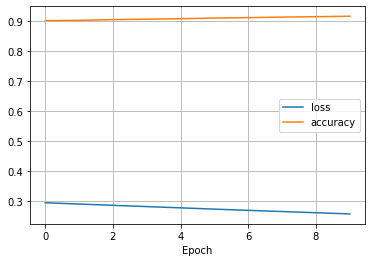

In [43]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid(True)
plot_loss(history)

In [47]:
pred = model.predict(X_test)

Nhập số thứ tự của một ảnh bất kì trong x_test (0 => 9999): 0


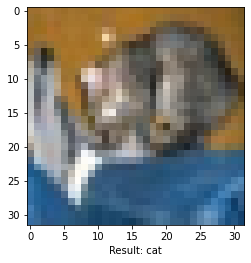

In [53]:
i = int(input("Nhập số thứ tự của một ảnh bất kì trong x_test (0 => 9999): "))
plt.imshow(X_test[i].reshape(32,32,3))
label = np.argmax(pred[i])
plt.xlabel("Result: " + class_name[label])
plt.show()